## Import packages and data

In [107]:
# Data from https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
aapl_df = pd.read_csv("aapl.csv")

## Examine the data

In [109]:
aapl_df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [110]:
aapl_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [111]:
aapl_df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

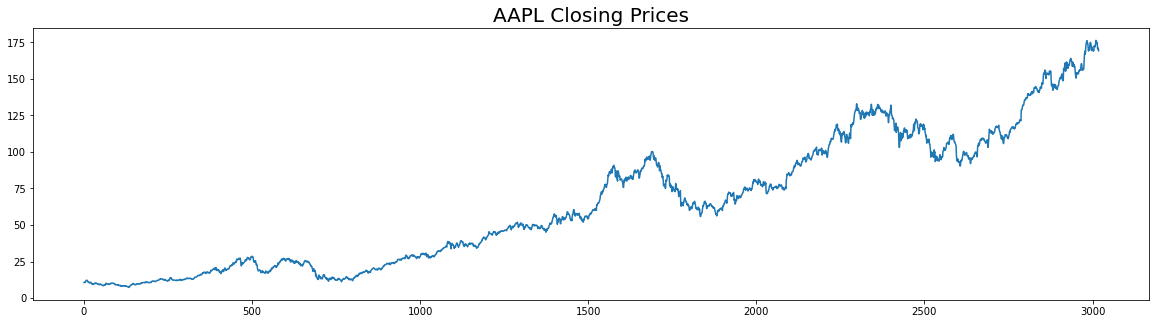

In [112]:
aapl_df['Close'].plot(figsize=(20,5))
plt.title("AAPL Closing Prices",size=20)
plt.show()

## Create QQ Plot

In [113]:
import scipy.stats
import pylab

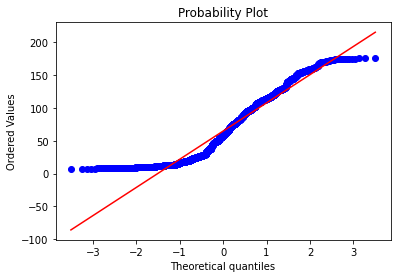

In [114]:
scipy.stats.probplot(aapl_df['Close'],plot=pylab)
pylab.show()

## Creating a Time Series Object

In [115]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])

In [116]:
aapl_df['Date'].describe()

C:\Users\nkanungo\AppData\Local\Temp\ipykernel_22560\2217752305.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aapl_df['Date'].describe()


count                    3019
unique                   3019
top       2006-01-03 00:00:00
freq                        1
first     2006-01-03 00:00:00
last      2017-12-29 00:00:00
Name: Date, dtype: object

In [117]:
aapl_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [118]:
aapl_df.set_index('Date',inplace=True)

In [119]:
aapl_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


## Setting the Frequency

In [120]:
aapl_df = aapl_df.asfreq('b')

In [121]:
aapl_df.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036.0,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609.0,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081.0,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334.0,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224.0,AAPL
2006-01-10,10.89,11.70,10.83,11.55,570088246.0,AAPL
2006-01-11,11.98,12.11,11.80,11.99,373548882.0,AAPL
2006-01-12,12.14,12.34,11.95,12.04,320201966.0,AAPL
2006-01-13,12.14,12.29,12.09,12.23,194153393.0,AAPL


In [122]:
aapl_df.isna().sum()

Open      110
High      110
Low       110
Close     110
Volume    110
Name      110
dtype: int64

In [123]:
aapl_df['Close'] = aapl_df['Close'].fillna(method="ffill")

In [124]:
aapl_df.isna().sum()

Open      110
High      110
Low       110
Close       0
Volume    110
Name      110
dtype: int64

## Selecting Series

In [125]:
aapl_df = aapl_df['Close']

In [126]:
aapl_df.head()

Date
2006-01-03    10.68
2006-01-04    10.71
2006-01-05    10.63
2006-01-06    10.90
2006-01-09    10.86
Freq: B, Name: Close, dtype: float64

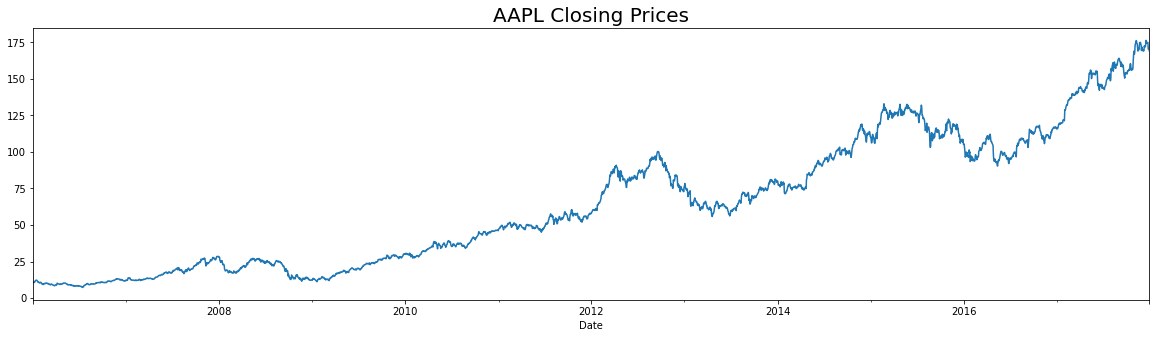

In [127]:
aapl_df.plot(figsize=(20,5))
plt.title("AAPL Closing Prices",size=20)
plt.show()

## Splitting Data

In [128]:
size = int(len(aapl_df)*0.8)

In [129]:
df_train = aapl_df.iloc[:size]
df_test = aapl_df.iloc[size:]

In [130]:
df_train.tail()

Date
2015-07-31    121.30
2015-08-03    118.44
2015-08-04    114.64
2015-08-05    115.40
2015-08-06    115.13
Freq: B, Name: Close, dtype: float64

In [131]:
df_test.head()

Date
2015-08-07    115.52
2015-08-10    119.72
2015-08-11    113.49
2015-08-12    115.24
2015-08-13    115.15
Freq: B, Name: Close, dtype: float64

## Export Data

In [132]:
df_train.to_csv("AAPL - Train.csv")
df_test.to_csv("AAPL - Test.csv")
aapl_df.to_csv("AAPL - Clean.csv")